<a href="https://colab.research.google.com/github/rafaelnduarte/Credit_Card_Fraud_Identification/blob/master/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection


<center><img width = '40%'src= "https://github.com/rafaelnduarte/Portfolio/blob/master/rafaelnd_banner.png?raw=true"></center>

[![LinkedIn](https://img.shields.io/badge/LinkedIn-rafaelnduarte-blue.svg)](https://www.linkedin.com/in/rafael-n-duarte)
[![GitHub](https://img.shields.io/badge/GitHub-rafaelnduarte-purple.svg)](https://github.com/rafaelnduarte)

---

In this project, we're going to address the issue of credit card fraud, one of the greatest concerns of both financial institutions and credit card users.

In Brazil alone, over 12 million people have already fallen victims of financial fraud in the last year. In numbers, that means over US$ 500 mi were lost in the past 12 months.


<p align=center>
<img src="https://images.unsplash.com/photo-1592772874383-d08932d29db7?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=699&q=80" width="60%"></p>


Among these frauds, those involving credit cards are highly relevant since failure in detecting them means huge losses for both consumers and financial institutions.

Another factor that plays a role in this game is false positives, that is when you try to make a purchase and have your card preventively blocked, which usually comes with stress and embarrassment.

That's why investing in fraud detection through Artificial Intelligence has been growing with the years, which is a great opportunity for Data Scientists. 

Having great volume of data, a Machine Learning Algorithm that performs just a little better thant the previous solutions already represents millions of dollars worth of savings. This is the challenge:

> Continuously improving the performance of Fraud Detection Systems, to inhibit or avoid fraudulent transactions.

## Importing the Data

We'll be using data provided by European Credit Card Companies. The dataset represents financial operations over a 2-day period, where 492 fraudulent transactions were found, among almost 290 thousand tracked transactions.

As you can see, this dataset is extremely imbalanced, and frauds represent only 0,17% of the total.

Another interesting detail is that the features are all numeric, and have been de-characterized, probably for privacy and security reasons. Therefore, the names of the columns are represented by $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="50%"></p>

[In the original source of the dataset](https://www.kaggle.com/mlg-ulb/creditcardfraud), we're also informed that the variables have gone through a transformation method called Principal Component Analysis - PCA.

PCA allows for a reduction of dimensionality while maintaining as much information as possible. To achieve that, the algorithm finds a new set of resources, called **components**.

These components are found in smaller or the same number as the original variables. In this case, the components found by PCA Transformation are the columns themselves $[V1, V2, V3 \dots, V28]$.

In [ ]:
#@title
# hide warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# installing scikit-plot
!pip install -q scikit-plot

In [ ]:
# importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from imblearn.under_sampling import RandomUnderSampler

# setting Seaborn graphic style
sns.set_style('dark')

In [ ]:
# importing the data into a dataframe
df = pd.read_csv("https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1")

Now that we have imported the data into a DataFrame structure, we can start our Exploratory Analysis to prepare for our Machine Learning Model.

## Exploratory Analysis

Just by looking at the first five entries we can already come to some conclusions:

* The first five entries allow us to understand how the PCA transformation left the features hidden (anonymous) and in great numerical values. To learn more about PCA, click on this [link](http://www2.ic.uff.br/~aconci/PCA-ACP.pdf).

* The columns `Time` and `Amount` have been preserved, keeping their original values.

* The target variable is represented in the column `Class`, where:
    * **0:** Normal Transaction; and
    * **1:** Fraudulent Transaction.

In [ ]:
# checking the first entries of the dataframe
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Statistical Distribution

Below, you'll find the Statistical Distribution, obtained with the `describe()` method, where we can confirm that the variables related to the main components (PCA Transformation) have no apparent discrepancy, as well as the `Time` column.

As for the variable `Amount`, we can see that the average value of the transactions (considering both classes) is €88.34, a median of €22.00 and, a Standard Deviation of €250.12. The highest value is €25.691.16 and, the biggest part of the transactions are smaller amounts - as expected.



In [ ]:
# statistical distribution
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


When it comes to the quality of the dataset, it hasn't presented any missing values or anything else that would demand cleaning.

Below, we'll find that the highest number found for `null` values is zero, which confirms that there are no missing values.

In [ ]:
# checking for missing values
df.isnull().sum().max()

0

As informed in the description of the [data](https://www.kaggle.com/mlg-ulb/creditcardfraud), fraudulent transactions represent 0,17% of the total.

In the bar graph below, it's easy to see how imbalanced the dataset is. In reality, it interferes with the performance of the model, and it will be necessary to balance the data before fitting it in our classification model.

0    284315
1       492
Name: Class, dtype: int64

Frauds represent 0.1727% of the dataset.



[]

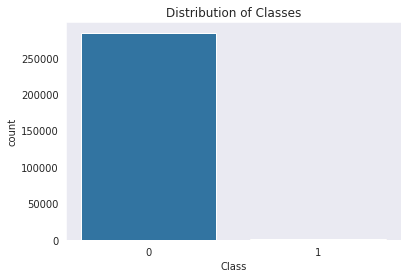

In [ ]:
# checking for class
print(df.Class.value_counts())
print("\nFrauds represent {:.4f}% of the dataset.\n".format((df[df.Class == 1].shape[0] / df.shape[0]) * 100))

# plotting a bar graph for Classes
fig, ax = plt.subplots()
sns.countplot('Class', data=df, ax=ax)
ax.set_title('Distribution of Classes')
plt.plot()

We also plotted 2 graphs to compare the distribution of the two classes through time (`Time`). However, no information could be found in the frequency distributions below.

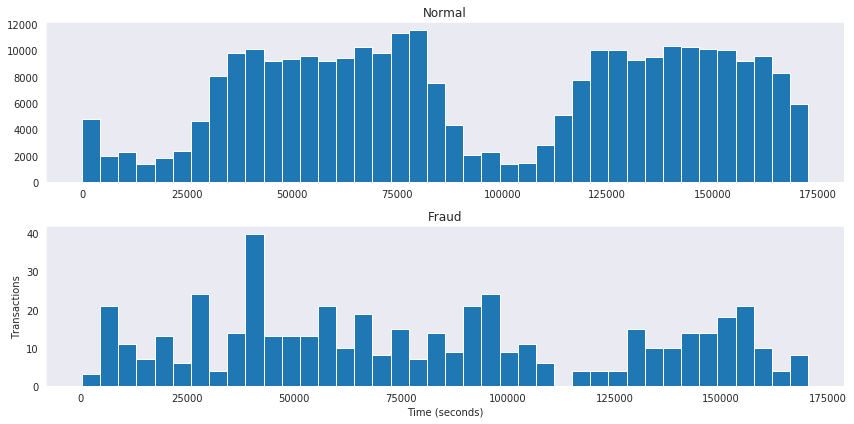

In [ ]:
# plotting histograms
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))

num_bins = 40

ax[0].hist(df.Time[df.Class == 0], bins=num_bins)
ax[0].set_title('Normal')

ax[1].hist(df.Time[df.Class == 1], bins=num_bins)
ax[1].set_title('Fraud')

plt.xlabel('Time (seconds)')
plt.ylabel('Transactions')
plt.tight_layout()

Moving along with our Exploratory Analysis, we plotted two boxplots to check whether there are differences in the variable `Amount`.

Overall, we can notice different distributions for each class, which will probably contribute to the training of our Machine Learning Model.

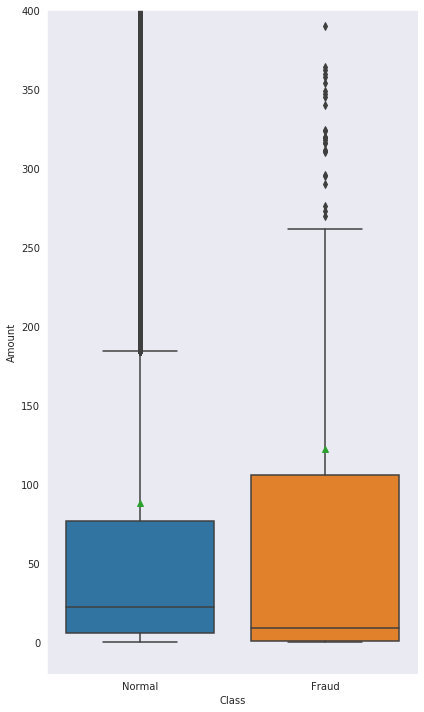

In [ ]:
# plotting boxplots

fig, ax = plt.subplots(figsize=(6,10), sharex=True)

sns.boxplot(df.Class, df.Amount, showmeans=True, ax=ax)
plt.ylim((-20, 400))
plt.xticks([0, 1], ['Normal', 'Fraud'])

plt.tight_layout()

Statistical information on `df.Class == 1` show that its exact average is at €118.13 and the median €9.21.

In [ ]:
# getting statistical information on the variable Amount for fraudulent transactions
df[(df.Class == 1) & (df.Amount < 2000)]['Amount'].describe()

count     491.000000
mean      118.130550
std       240.439028
min         0.000000
25%         1.000000
50%         9.210000
75%       105.350000
max      1809.680000
Name: Amount, dtype: float64

### Density Graphs

Density graphs are useful tools to compare variable distributions for each class and find the most important ones for our fraud detection model.

What we're looking for in this kind of visualization are distributions that differ from one another. That allows us to identify frauds more easily. For instance, take a look at the variables `V3`, `V4`, `V10` and `V11`, and see how they're distinct.


On the other hand, variables like `V8`, `V13` and, `V15` are very similar.


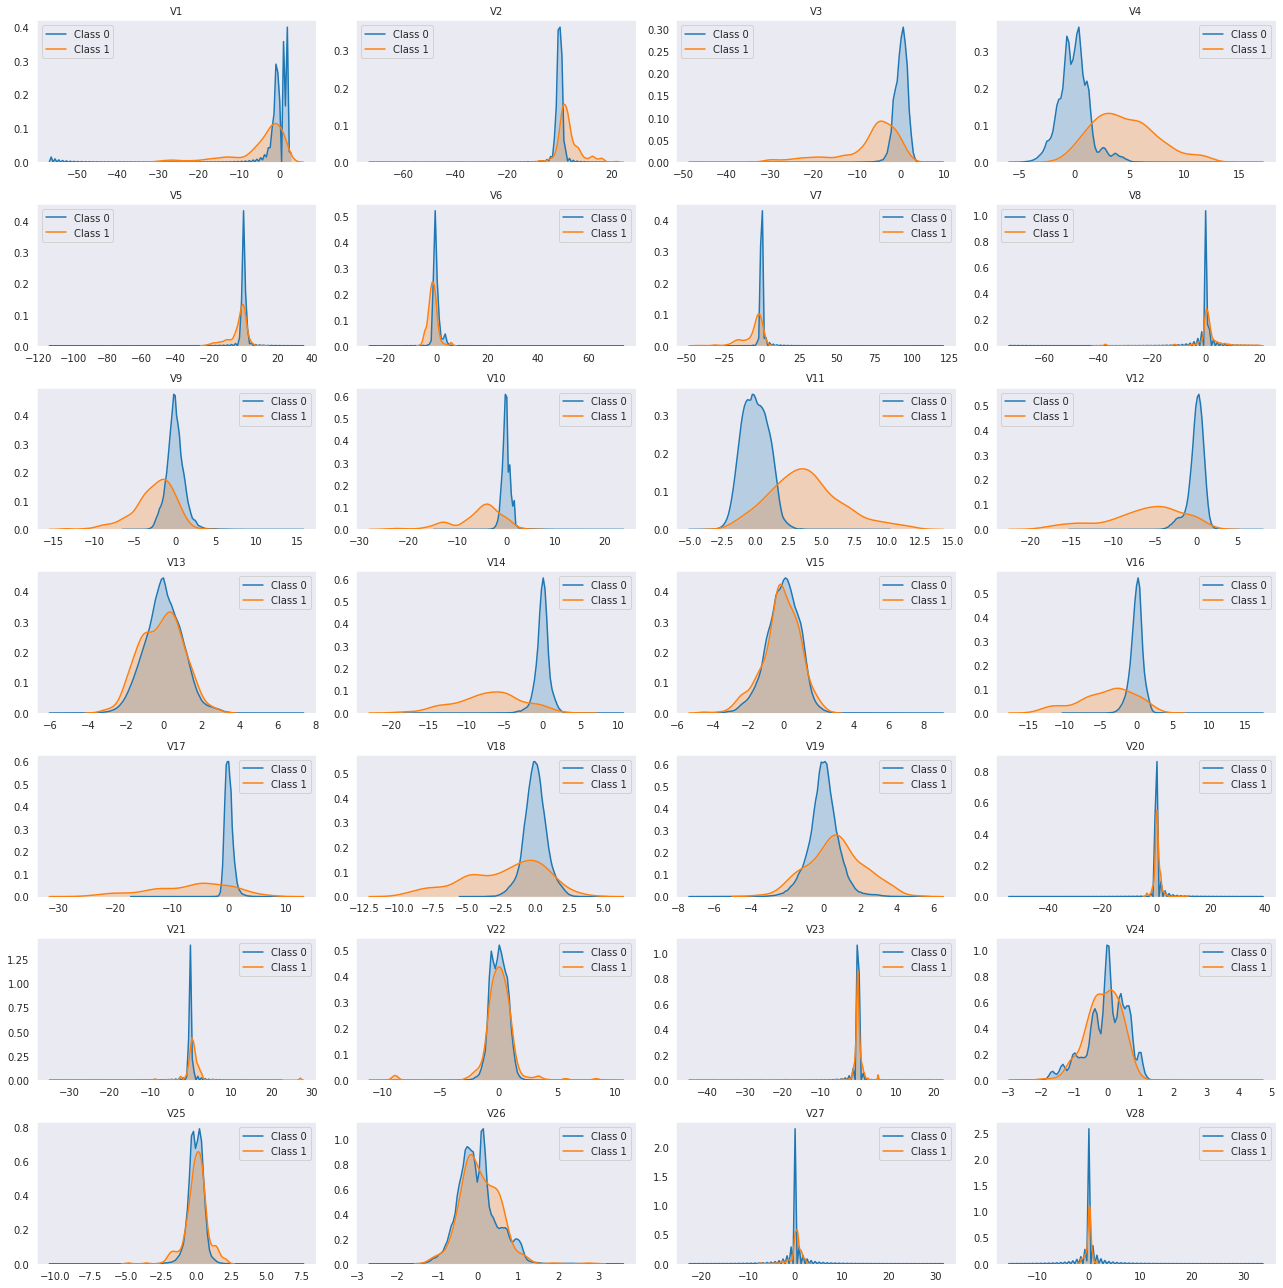

In [ ]:
# plotting density graphs
column_names = df.drop(['Class', 'Amount', 'Time'], axis=1).columns
num_plots = len(column_names)
df_class_0 = df[df.Class == 0]
df_class_1 = df[df.Class == 1]

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in column_names:
    idx += 1
    plt.subplot(7, 4, idx)
    sns.kdeplot(df_class_0[col], label="Class 0", shade=True)
    sns.kdeplot(df_class_1[col], label="Class 1", shade=True)
    plt.title(col, fontsize=10)
plt.tight_layout()


#### Conclusions

In short, we can mention some of the main observations:

* The dataset is highly imbalanced, since frauds represent only 0.17% of all entries.
* There are no missing or null values in the dataframe
* Since PCA is sensitive to the scale of variables, we assume that the original features have been standardized.
* Columns `Time` and `Amount` haven't been normalized.

## Preparing the data

In order to fit our data in the Logistic Regression model we're going to build, we'll have to:

* Standardize the features `Time` and `Amount`, which are in a different scale.
* Slit the data between train and test
* Balance the dataset to avoid performance problems and overfitting.

#### Standardize `Time` and `Amount`

Since `Amount` has outliers, we're going to standardize it using `StandardScaler`.

In [ ]:
# standardizing Time and Amount
df_clean = df.copy()

std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# checking first entries
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


#### Splitting train and test dataframes

Before moving on with balancing the data, we have to split the existing data between train and test. Otherwise, we won't have the necessary parameters to check if balancing was the right choice.

To make sure that both datasets have the same proportion of classes, we'll use `stratify=True`.

In [ ]:
# separating variables between X and y
X = df_clean.drop('Class', axis=1)
y = df['Class']

# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

#### Balancing the dataset

Using the `imblearn` library we can easily apply balancing techniques. In our case, the best option was to use Under-sampling, preserving the minoritory class.

It's easy to see that we no longer have that initial discrepancy (bar graph at the beginning of this notebook).

1    369
0    369
dtype: int64


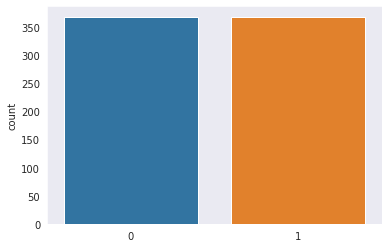

In [ ]:
# applying under-sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)

# checking for class balance
print(pd.Series(y_rus).value_counts())

# plotting new class distribution
sns.countplot(y_rus);

Now that our data is balanced, we can check our correlation matrix and identify which variables are more strongly related to the others.

If you pay attention to the matrix on the left (imbalanced), you'll see that it doesn't bring any relevant information. However, after proper balancing, it brings much more information.


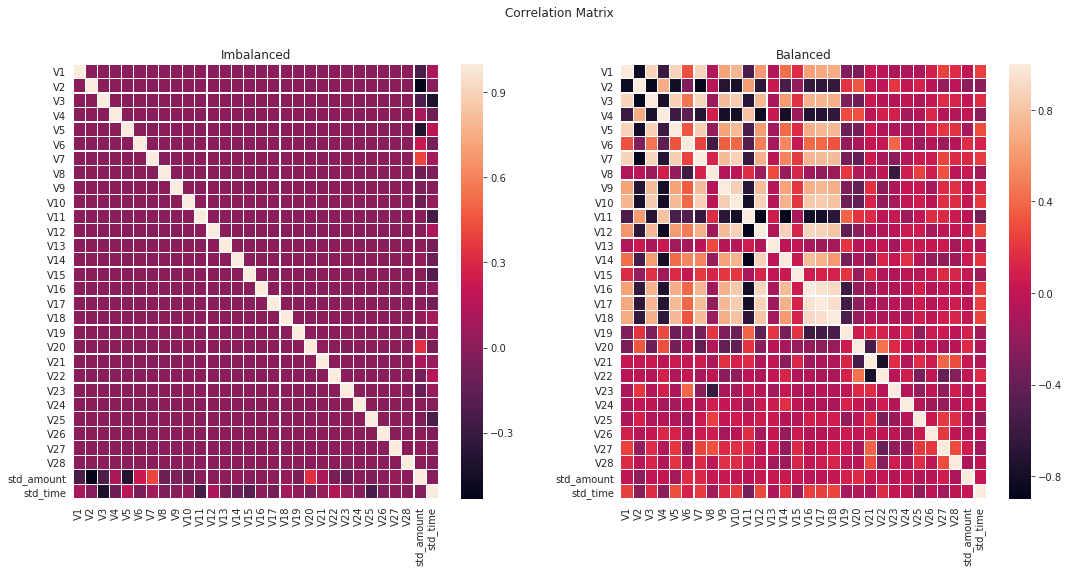

In [ ]:
# plotting a correlation matrix
corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()


fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18,8))
fig.suptitle('Correlation Matrix')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linecolor='white', linewidths=.1, ax=ax[0])
ax[0].set_title('Imbalanced')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linecolor='white', linewidths=.1,  ax=ax[1])
ax[1].set_title('Balanced')

plt.show()

## Machine Learning Model

<center><img alt='Machine Learning'  width='30%'src="https://image.freepik.com/free-vector/digital-code-diagram-technology-artificial-intelligence_1017-11828.jpg"></center>

> **Now that we have the data prepared after a thorough exploratory analysis, it's time to build a classifier using Logistic Regression.**

After creating an instance of the model, it will be trained on the data from `X_rus` and `y_rus`. After that, we'll get predictions o the test dataset.


#### Importance of preparing the data properly

Just so we have a proper understanding of what would have happened had we not treated our dataset properly, I'm going to train the model, and make predictions on the imbalanced dataset.

It may serve as baseline for us, but more importantly, validate our data processing stage.


In [ ]:
# creating a copy of the imbalanced dataset
imb_df = df.copy()

# separating variables between X and y
imb_X = imb_df.drop('Class', axis=1)
imb_y = df['Class']

# splitting the dataset
imb_X_train, imb_X_test, imb_y_train, imb_y_test = train_test_split(X, y, stratify=y, shuffle=True)



In [ ]:
# instantiating and training a Logistic Regression model
np.random.seed(2)
imb_model = LogisticRegression()
imb_model.fit(imb_X_train, imb_y_train)

# predicting on the test dataset
imb_y_pred = imb_model.predict(imb_X_test)
imb_y_proba = imb_model.predict_proba(imb_X_test)

Classification Report:
               precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     71079
           1     0.9271    0.7236    0.8128       123

    accuracy                         0.9994     71202
   macro avg     0.9633    0.8617    0.9062     71202
weighted avg     0.9994    0.9994    0.9994     71202

Accuracy: 0.9994

AUC: 0.8617



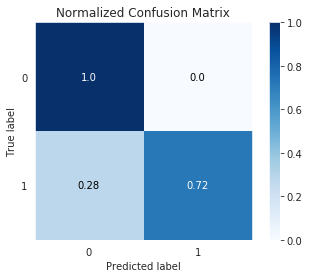

In [ ]:
# plotting a confusion matrix
skplt.metrics.plot_confusion_matrix(imb_y_test, imb_y_pred, normalize=True)

# printing a Classification Report
print("Classification Report:\n", classification_report(imb_y_test, imb_y_pred, digits=4))

# printing Accuracy
print("Accuracy: {:.4f}\n".format(accuracy_score(imb_y_test, imb_y_pred)))

# printing AUC
print("AUC: {:.4f}\n".format(roc_auc_score(imb_y_test, imb_y_pred)))

#### Conclusions on the Imbalanced dataset

After training the model, and making predictions, it's time to evaluate its performance.

For this kind of problem, originally imbalanced, the accuracy isn't the best metric. As we can see in [this articlce](https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb), you can have an accuracy of 99.88% and still detect only 60% of fraudulent transactions. This is exaclty what happened here. We have an excellent Accuracy score, but we also have a not-so-good number of False Negatives, which means criminals "got away with" frauding customers. It's easy to see why that's a problem.

Pay attention to the confusion matrix to see the rate of correct predictions. Another way to check for that is analyzing the column `recall` on the Classification Report.

Another interesting metric to evaluate efficiency is [AUC ROC](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5). For this Logistic Regression model, we got and AUC of 86%.

To be honest, this is not a bad baseline, but it's clear to see that we've got plenty of room for improvement.

Let's see what else we can do.


In [ ]:
# instantiating and training a Logistic Regression model
np.random.seed(2)
model = LogisticRegression()
model.fit(X_rus, y_rus)

# predicting on the test dataset
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

#### Balanced Dataset

Now that we have a baseline, and know what can be achieved with a model based on an imbalaced dataset, let's see if all that work was worth it.


Classification Report:
               precision    recall  f1-score   support

           0     0.9999    0.9662    0.9828     71079
           1     0.0461    0.9431    0.0878       123

    accuracy                         0.9662     71202
   macro avg     0.5230    0.9546    0.5353     71202
weighted avg     0.9983    0.9662    0.9812     71202

Accuracy: 0.9662

AUC: 0.9546



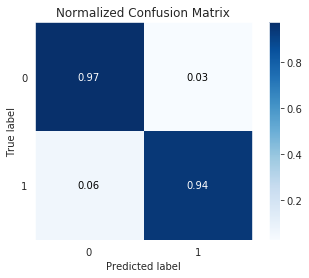

In [ ]:
# plotting a confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# printing a Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))

# printing Accuracy
print("Accuracy: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# printing AUC
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

#### Conclusions on the Balanced Model
* First of all, way better results on False Negatives and Positives, which means security and convenience for customers, and that's our goal!

* For this Logistic Regression model, we got and AUC of 95%, which is an excellent result, and almost 10% better than the baseline.

## Conclusions

As you could see, this is not a simple problem. Despite having clean and well treated data, without any missing or null values and categorical features, balancing and PCA Transformation take time.

Obviously, in spite of being a good result, there's always room for improvement. We can try to implement other algorithms, optmize parameters, among others. For now, this is a great result.

Hope you enjoyed the project, and I'm looking forward to your feedback. Make sure to visit my LinkedIn and GitHub (links below) to see more of my projects.

[<center><img alt="LinkedIn" width="10%" src="https://www.freepnglogos.com/uploads/linkedin-png-logo-23.png
"></center>](https://www.linkedin.com/in/rafael-n-duarte/) 
[<center><img alt="GitHub" width="10%" src="https://github.githubassets.com/images/modules/logos_page/GitHub-Logo.png
"></center>](https://github.com/rafaelnduarte)
